In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from controlgame import ControlGame

In [3]:
game = ControlGame(runtime=30)  # seconds

# Instructions

Run the cell below and click the "run" button. Then move the "MV" slider in a way which gets the controlled slider close to the setpoint. Your score increases more quickly when Controlled is near Setpoint. See how high your score can get by clicking run a couple of times. To see your performance graphed out, execute the next cell (`game.plot()`)

In [5]:
game.ui()

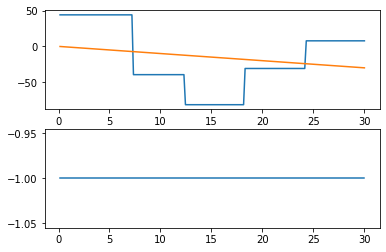

In [6]:
game.plot()